<a href="https://colab.research.google.com/github/owengenge/cap-comp215/blob/main/Project_1_Plotting_NEO's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project 1: Plotting Potentially Hazardous Near Earth Objects**

Name: Owen Genge

Date: Feb 19, 2023



In [9]:
import datetime, json, requests
from pprint import pprint   
from dataclasses import dataclass
import matplotlib.pyplot as plt


This program will display a scatter plot of NEOs (near Earth objects) based on the distances of their miss from Earth and the date of the miss. 

### **User Guide:**
1.   Run the program (Runtime -> Run all).
2.   Input the start date of the time series you wish retrieve data from in format YYYY-MM-DD.
3.   Input the end date of the time series (maximum 7 days after the start date) in the same format.
4.   Input the orbiting body of the NEOs.
5.   Input "True" for potentially hazardous NEOs or "False" for non hazardous NEOs.
6.   The scatter plot based on the given parameters will be shown. 


Input the start date (format YYYY-MM-DD): 2004-07-09
Input the end date (maximum 7 days after start date): 2004-07-16
Input the orbiting body of the NEOs: Earth
Input "True" for potentially hazardous NEOs or "False" for non hazardous NEOs: True


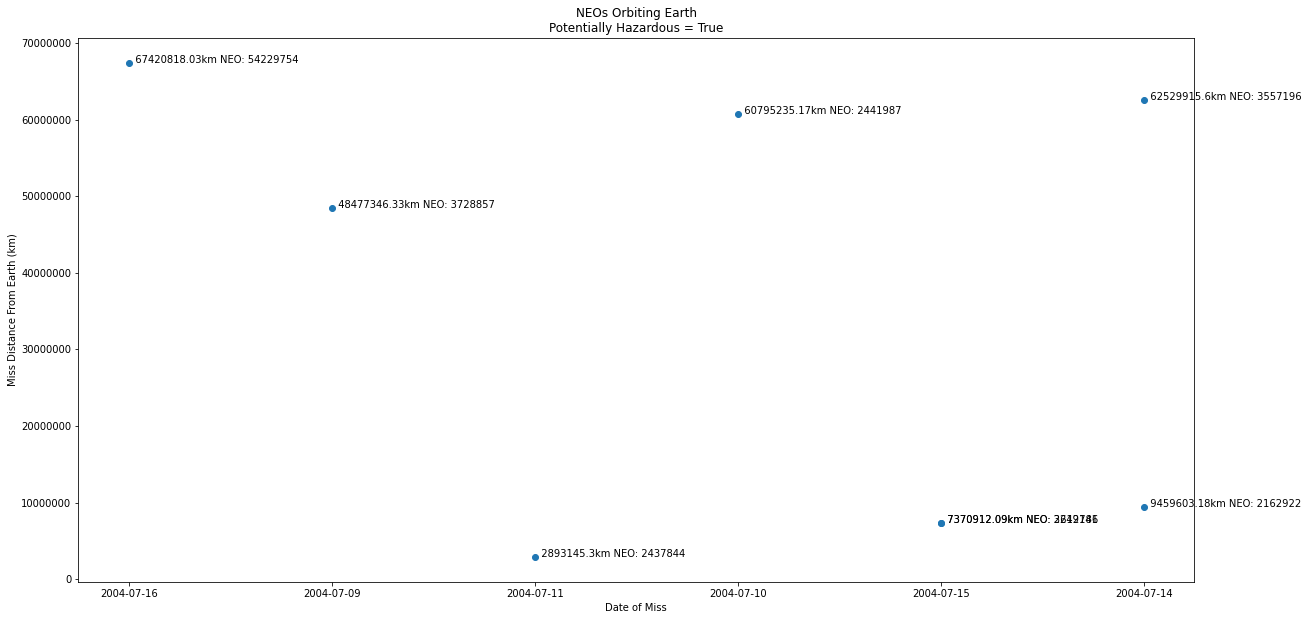

In [10]:
def ast_miss_data():
  ''' Displays a scatter plot of NEOs distances from Earth in a given time series.'''
  
  start_date = str(input('Input the start date (format YYYY-MM-DD): '))
  end_date = str(input('Input the end date (maximum 7 days after start date): '))
  orbiting_body = str(input('Input the orbiting body of the NEOs: '))
  potentially_hazardous = bool(input('Input "True" for potentially hazardous NEOs or "False" for non hazardous NEOs: '))

  API_KEY = 'BQuTOmvJ8rJthGRwxNG8a02iQmcoaXEMxQ0rviXq'  
  url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&end_date={end_date}&api_key={API_KEY}'
  response = requests.request("GET", url, headers={}, data={})
  data = json.loads(response.text)  
  
  neos = data['near_earth_objects']
  
  dates = neos.keys()
  
  miss_distances = []
  approach_dates = []
  IDs = []
  for date in dates:
    neos = data['near_earth_objects'][date]
    cad = [item['close_approach_data'] for item in neos]
    miss_distances.extend([float(cad[i][0]['miss_distance']['kilometers']) for i in range(len(neos))
                          if cad[i][0]['orbiting_body'] == orbiting_body 
                           and neos[i]['is_potentially_hazardous_asteroid'] is potentially_hazardous])
    approach_dates.extend([cad[i][0]['close_approach_date'] for i in range(len(neos)) 
                          if cad[i][0]['orbiting_body'] == orbiting_body
                           and neos[i]['is_potentially_hazardous_asteroid'] is potentially_hazardous])
    IDs.extend([neos[i]['id'] for i in range(len(neos)) if cad[i][0]['orbiting_body'] == orbiting_body
                           and neos[i]['is_potentially_hazardous_asteroid'] is potentially_hazardous])
  
  plt.rcParams["figure.figsize"] = (20,10)
  plt.title(f'NEOs Orbiting {orbiting_body}\nPotentially Hazardous = {potentially_hazardous}')
  plt.ylabel('Miss Distance From Earth (km)')
  plt.xlabel('Date of Miss')
  plt.ticklabel_format(style='plain')
  
  plt.scatter(approach_dates, miss_distances)
  
  for i in range(len(IDs)):
    plt.annotate((f'  {round(miss_distances[i],2)}km NEO: {IDs[i]}'),(approach_dates[i],miss_distances[i]))
  
  plt.show

  
ast_miss_data()




